<a href="https://colab.research.google.com/github/krikorantranik/Work/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using RandomForest and descriptive analytics, see if it is possible to predict if a person earns more or less than 50k dollars

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install klib
import klib
!pip install dabl
import dabl
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import tree

Load the dataset and quick exploration.

From the description of the dataset:

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [20]:
maindataset = pd.read_csv("adultsalary.csv")
print(maindataset)
print(maindataset.columns)

       age          workclass   fnlwgt   education   education-num  \
0       39          State-gov    77516   Bachelors              13   
1       50   Self-emp-not-inc    83311   Bachelors              13   
2       38            Private   215646     HS-grad               9   
3       53            Private   234721        11th               7   
4       28            Private   338409   Bachelors              13   
...    ...                ...      ...         ...             ...   
48837   39            Private   215419   Bachelors              13   
48838   64                  ?   321403     HS-grad               9   
48839   38            Private   374983   Bachelors              13   
48840   44            Private    83891   Bachelors              13   
48841   35       Self-emp-inc   182148   Bachelors              13   

            marital-status          occupation     relationship  \
0            Never-married        Adm-clerical    Not-in-family   
1       Married-civ-spous

Right from the start I can see that some columns are going to be correlated (marital status - relationship, education and education numerical) and some others are basically empty.

The next step is a review of the numerical variables

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel=' hours-per-week', ylabel='Density'>

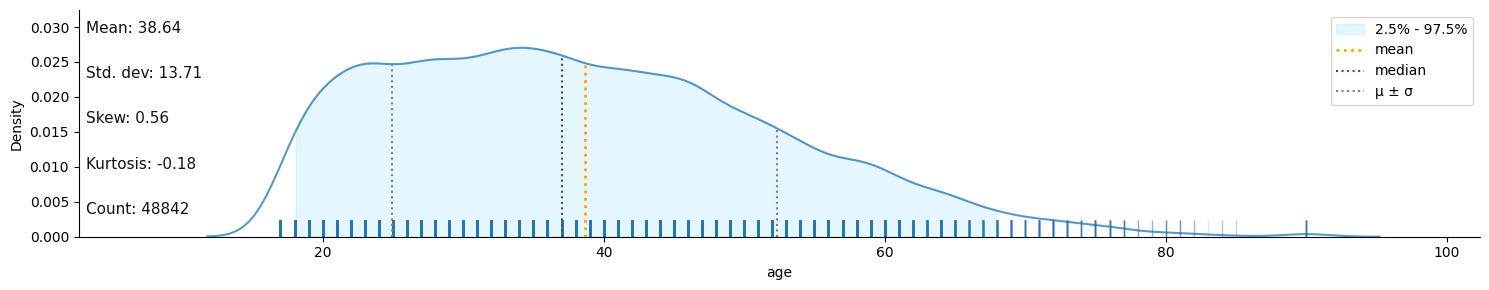

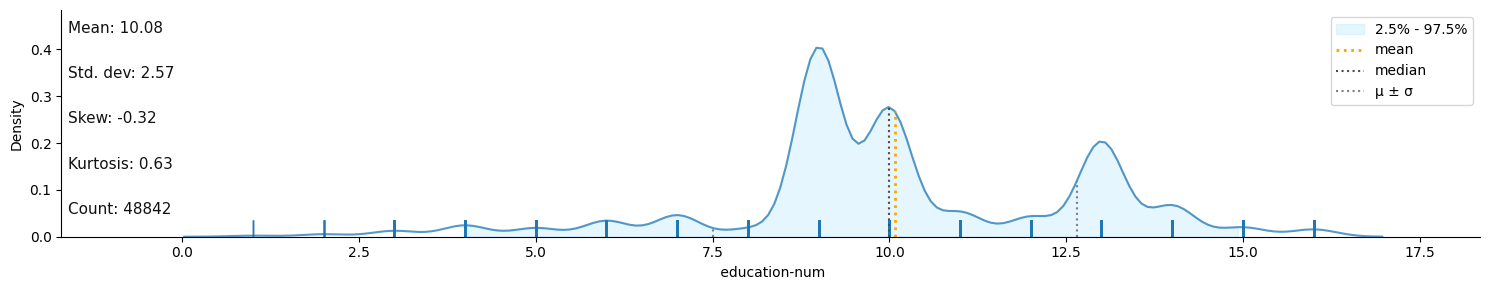

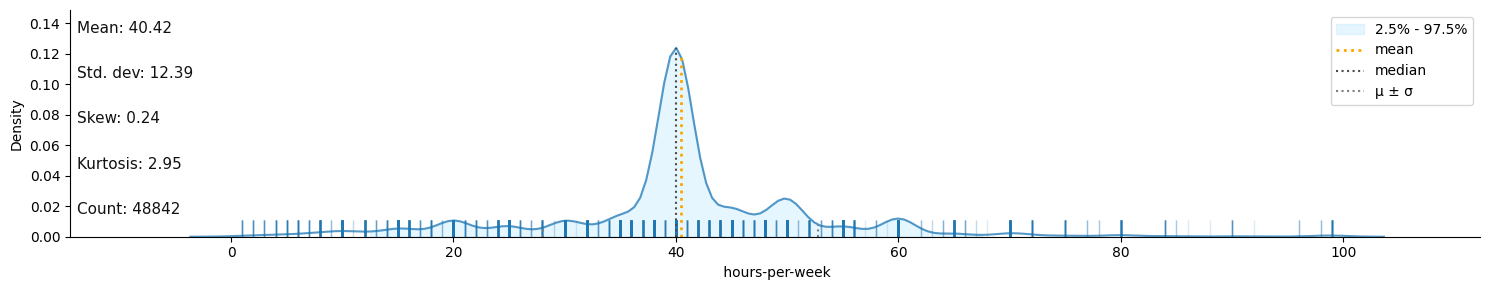

In [21]:
klib.dist_plot(maindataset['age'])
klib.dist_plot(maindataset[' education-num'])
klib.dist_plot(maindataset[' hours-per-week'])

For the categorical variables:

GridSpec(6, 7)

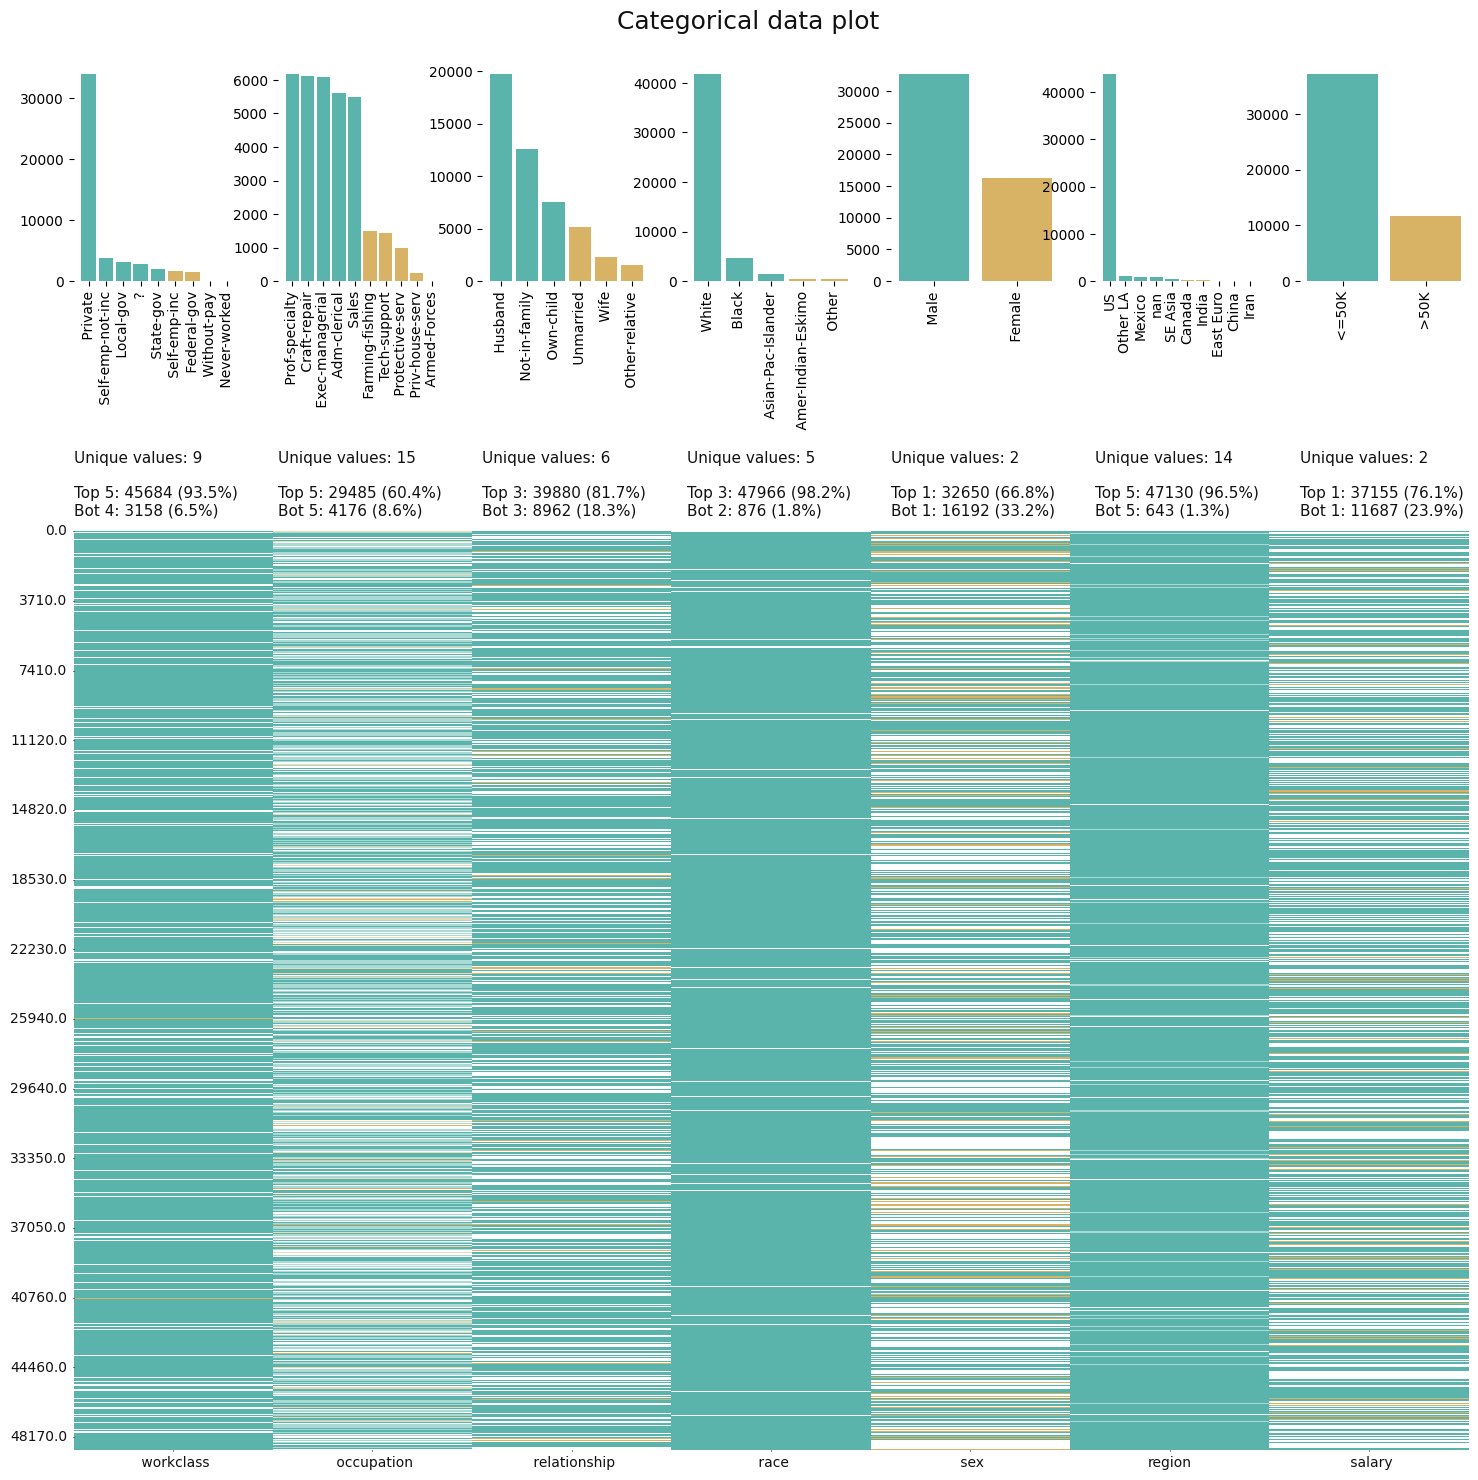

In [22]:
#I am going to group the countries of origin to reduce the number of values of the variable
us = [' United-States']
latin = [' Cuba',' South',' Puerto-Rico',' Honduras',' Columbia',' Ecuador',' Dominican-Republic',' El-Salvador',' Guatemala',' Peru',' Nicaragua']
carib = [' Jamaica',' Haiti',' Outlying-US(Guam-USVI-etc)',' Trinadad&Tobago']
mexico = [' Mexico']
canada = [' Canada']
westeur = [' England',' Germany',' France',' Scotland',' Ireland',' Holand-Netherlands']
easteur = [' Poland',' Yugoslavia',' Hungary']
southeur = [' Italy',' Portugal',' Greece']
iran = [' Iran']
india = [' India']
seasia = [' Philippines',' Cambodia',' Thailand',' Laos',' Vietnam']
china = [' China']
easia = [' Taiwan',' Japan',' Hong']

maindataset['region'] = np.nan
maindataset['region'] = np.where(maindataset[' native-country'].isin(us),'US',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(latin),'Other LA',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(carib),'Caribbean',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(mexico),'Mexico',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(canada),'Canada',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(westeur),'West Euro',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(easteur),'East Euro',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(southeur),'South Euro',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(iran),'Iran',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(india),'India',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(seasia),'SE Asia',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(china),'China',maindataset['region'])
maindataset['region'] = np.where(maindataset[' native-country'].isin(easia),'E Asia',maindataset['region'])


maindataset[' salary'] = np.where(maindataset[' salary']==' <=50K.',' <=50K',maindataset[' salary'])
maindataset[' salary'] = np.where(maindataset[' salary']==' >50K.',' >50K',maindataset[' salary'])

klib.cat_plot(maindataset[[' workclass', ' occupation', ' relationship', ' race', ' sex', 'region', ' salary']], top=5, bottom=5)

Now I apply the filters and clean the data

In [33]:
maindatasetF = maindataset[['age',' education-num',' hours-per-week',' workclass', ' occupation', ' relationship', ' race', ' sex', 'region', ' salary']]
maindatasetF = maindatasetF[maindatasetF[' workclass']!=' ?']
maindatasetF = maindatasetF[maindatasetF[' occupation']!=' ?']
maindatasetF = maindatasetF.dropna()
maindatasetF

,age,education-num,hours-per-week,workclass,occupation,relationship,race,sex,region,salary
0,39,13,40,State-gov,Adm-clerical,Not-in-family,White,Male,US,<=50K
1,50,13,13,Self-emp-not-inc,Exec-managerial,Husband,White,Male,US,<=50K
2,38,9,40,Private,Handlers-cleaners,Not-in-family,White,Male,US,<=50K
3,53,7,40,Private,Handlers-cleaners,Husband,Black,Male,US,<=50K
4,28,13,40,Private,Prof-specialty,Wife,Black,Female,Other LA,<=50K
...,...,...,...,...,...,...,...,...,...,...
48836,33,13,40,Private,Prof-specialty,Own-child,White,Male,US,<=50K
48837,39,13,36,Private,Prof-specialty,Not-in-family,White,Female,US,<=50K
48839,38,13,50,Private,Prof-specialty,Husband,White,Male,US,<=50K
48840,44,13,40,Private,Adm-clerical,Own-child,Asian-Pac-Islander,Male,US,<=50K


Exploring the correlations.

For numerical data:

<Axes: title={'center': 'Feature-correlation (pearson)'}>

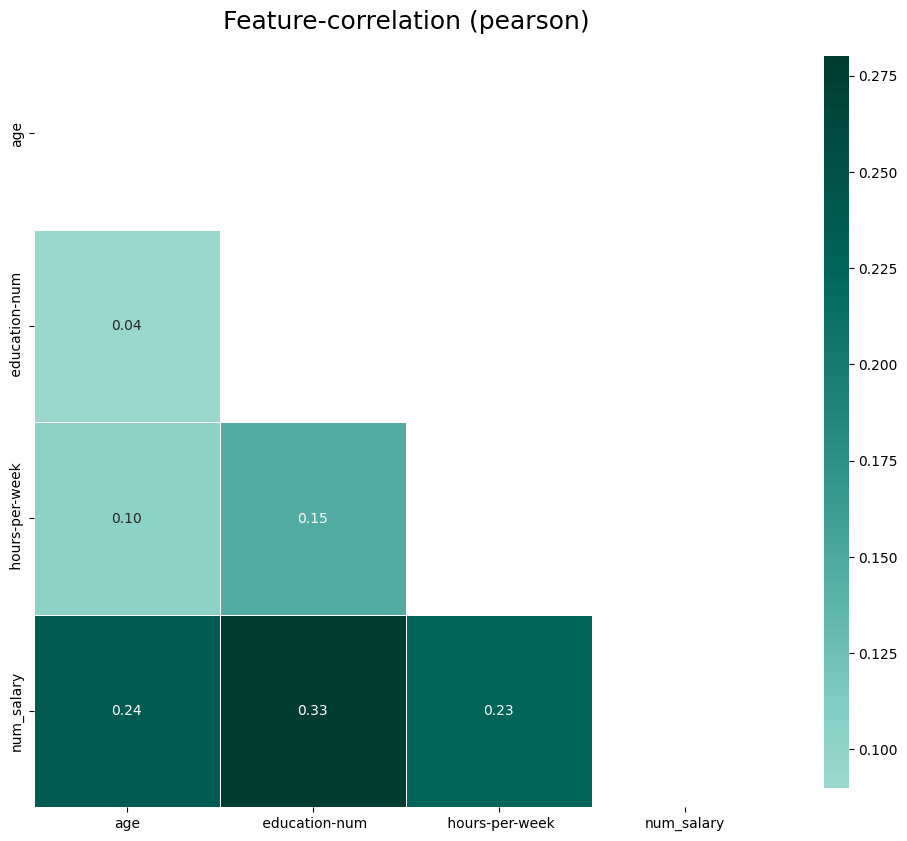

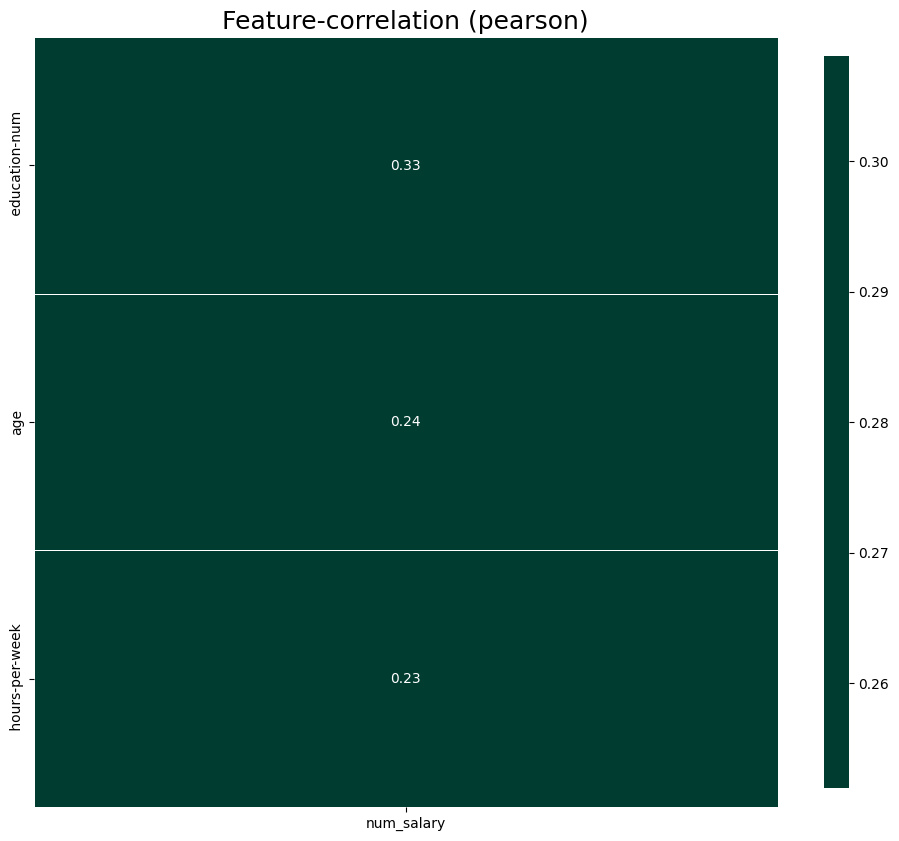

In [34]:
maindatasetF['num_salary'] = np.where(maindatasetF[' salary']==' <=50K',0,1)
klib.corr_plot(maindatasetF)
klib.corr_plot(maindatasetF, target='num_salary')

Which are not strong, positive, correlations

For the categorical data two tests are important:

1) Chi-square: to test for independence between the categorical variables.

2) ANOVA: to determine if between the values of the categorical variables there is a difference in the outcome (salary range).

For the Chi-square test:

In [55]:
#build contingency table between groups

maindatasetF = maindatasetF.rename(columns={' salary':'salary', ' workclass':'workclass', ' occupation':'occupation', ' relationship':'relationship', ' race':'race', ' sex':'sex'})

catvar = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'region', 'salary']

xtabs = []
pairs = []
for i in catvar:
 for j in catvar:
  if i!=j:
   pair = pd.DataFrame([[i,j]], columns=['i','j'])
   data_xtab = pd.crosstab(maindatasetF[i],maindatasetF[j],margins=False)
   xtabs.append(data_xtab)
   pairs.append(pair)
pairs = pd.concat(pairs, ignore_index=True, axis=0)

ps = []
for i in xtabs:
 stat, p, dof, expected = chi2_contingency(i)
 ps.append(p)

pairs['p values'] = ps
pairs



,i,j,p values
0,workclass,occupation,0.000000e+00
1,workclass,relationship,0.000000e+00
2,workclass,race,1.133481e-120
3,workclass,sex,6.471038e-199
4,workclass,region,9.619473e-43
5,workclass,salary,9.870688e-264
6,occupation,workclass,0.000000e+00
7,occupation,relationship,0.000000e+00
8,occupation,race,1.627075e-218
9,occupation,sex,0.000000e+00


These very low values of p mean that there is dependency between the features.

ANOVA test

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('num_salary ~ region + workclass + occupation + relationship + race + sex', data=maindatasetF).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
region,18.109715,12.0,11.491838,1.737513e-23
workclass,44.343395,6.0,56.277760,1.264454e-69
occupation,572.052043,13.0,335.082161,0.000000e+00
relationship,1021.501730,5.0,1555.708489,0.000000e+00
race,4.654323,4.0,8.860447,3.792580e-07
sex,30.866125,1.0,235.039705,6.452697e-53
Residual,5933.174303,45180.0,NaN,NaN


These low values of P mean that we can reject the NULL hypothesis, specifying that there is a difference between the members of the categorical features, and so, there is predictive power in them.

Next, it's a random forest classification, and get the variable importance.

In [67]:
num_columns = ['age',' education-num',' hours-per-week']
cat_columns = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'region']
cat_preprocessor = OneHotEncoder(handle_unknown="ignore")
num_preprocessor = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", cat_preprocessor, cat_columns),
        ("standard_scaler", num_preprocessor, num_columns),
    ])

train, test = train_test_split(maindatasetF, train_size=0.8)
train = train.dropna()

X_train = train[['age',' education-num',' hours-per-week','workclass', 'occupation', 'relationship', 'race', 'sex', 'region']]
Y_train = train[['num_salary']]

X = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X_train))
catnames = preprocessor.transformers_[0][1].get_feature_names_out(cat_columns).tolist()
numnames = preprocessor.transformers_[1][1].get_feature_names_out(num_columns).tolist()
featnames = catnames + numnames

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, Y_train)

<ipython-input-67-093fd700e8f2>:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, Y_train)


RandomForestClassifier()

Plot of the importance of the variables

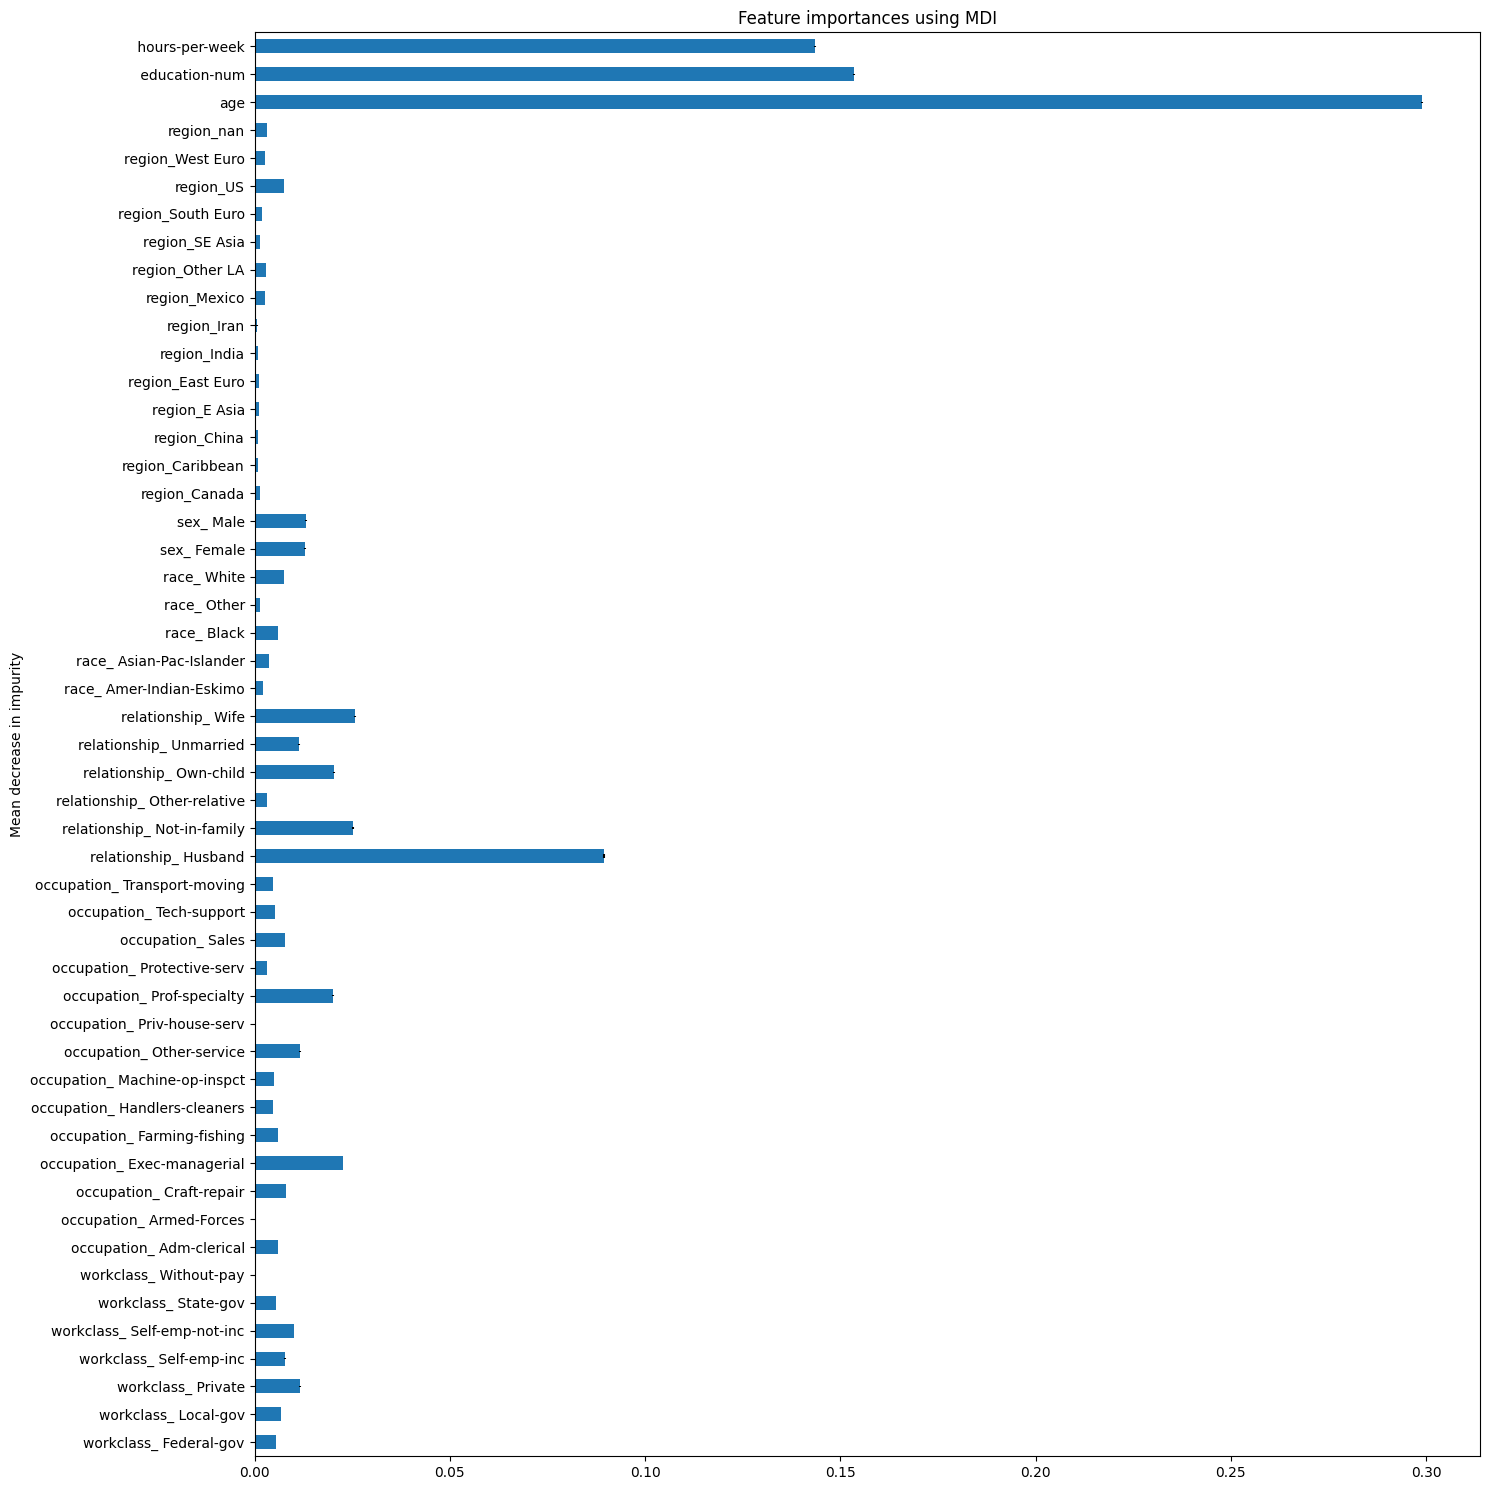

In [68]:
imp = rf.feature_importances_
imp = pd.Series(imp, index=featnames)
std = pd.Series(np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0), index=featnames)
fig, ax = plt.subplots()
imp.plot(kind='barh', yerr=std, ax=ax, figsize=(15,15))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

Age, education, hours worked and the fact that the subject is a husband dominate in the outcome of the salary, which is in line with what we know of the society we live in.

Now, I am performing a test with a confusion matrix to see how accurately we can predict the salary from the Random Forest model.

<Axes: >

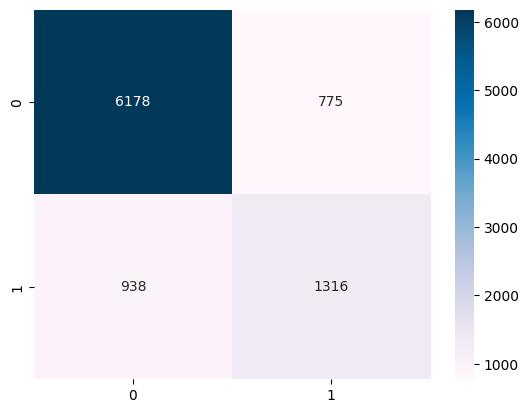

In [75]:
X_test = test[['age',' education-num',' hours-per-week','workclass', 'occupation', 'relationship', 'race', 'sex', 'region']]
Y_test = test[['num_salary']]

Xt = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X_test))
Yt = rf.predict(Xt)

cm = confusion_matrix(Y_test['num_salary'], Yt)
sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

Which can be improved, but it is a start.

I would like to draw a decision tree as well, so see the variables act in a graph.

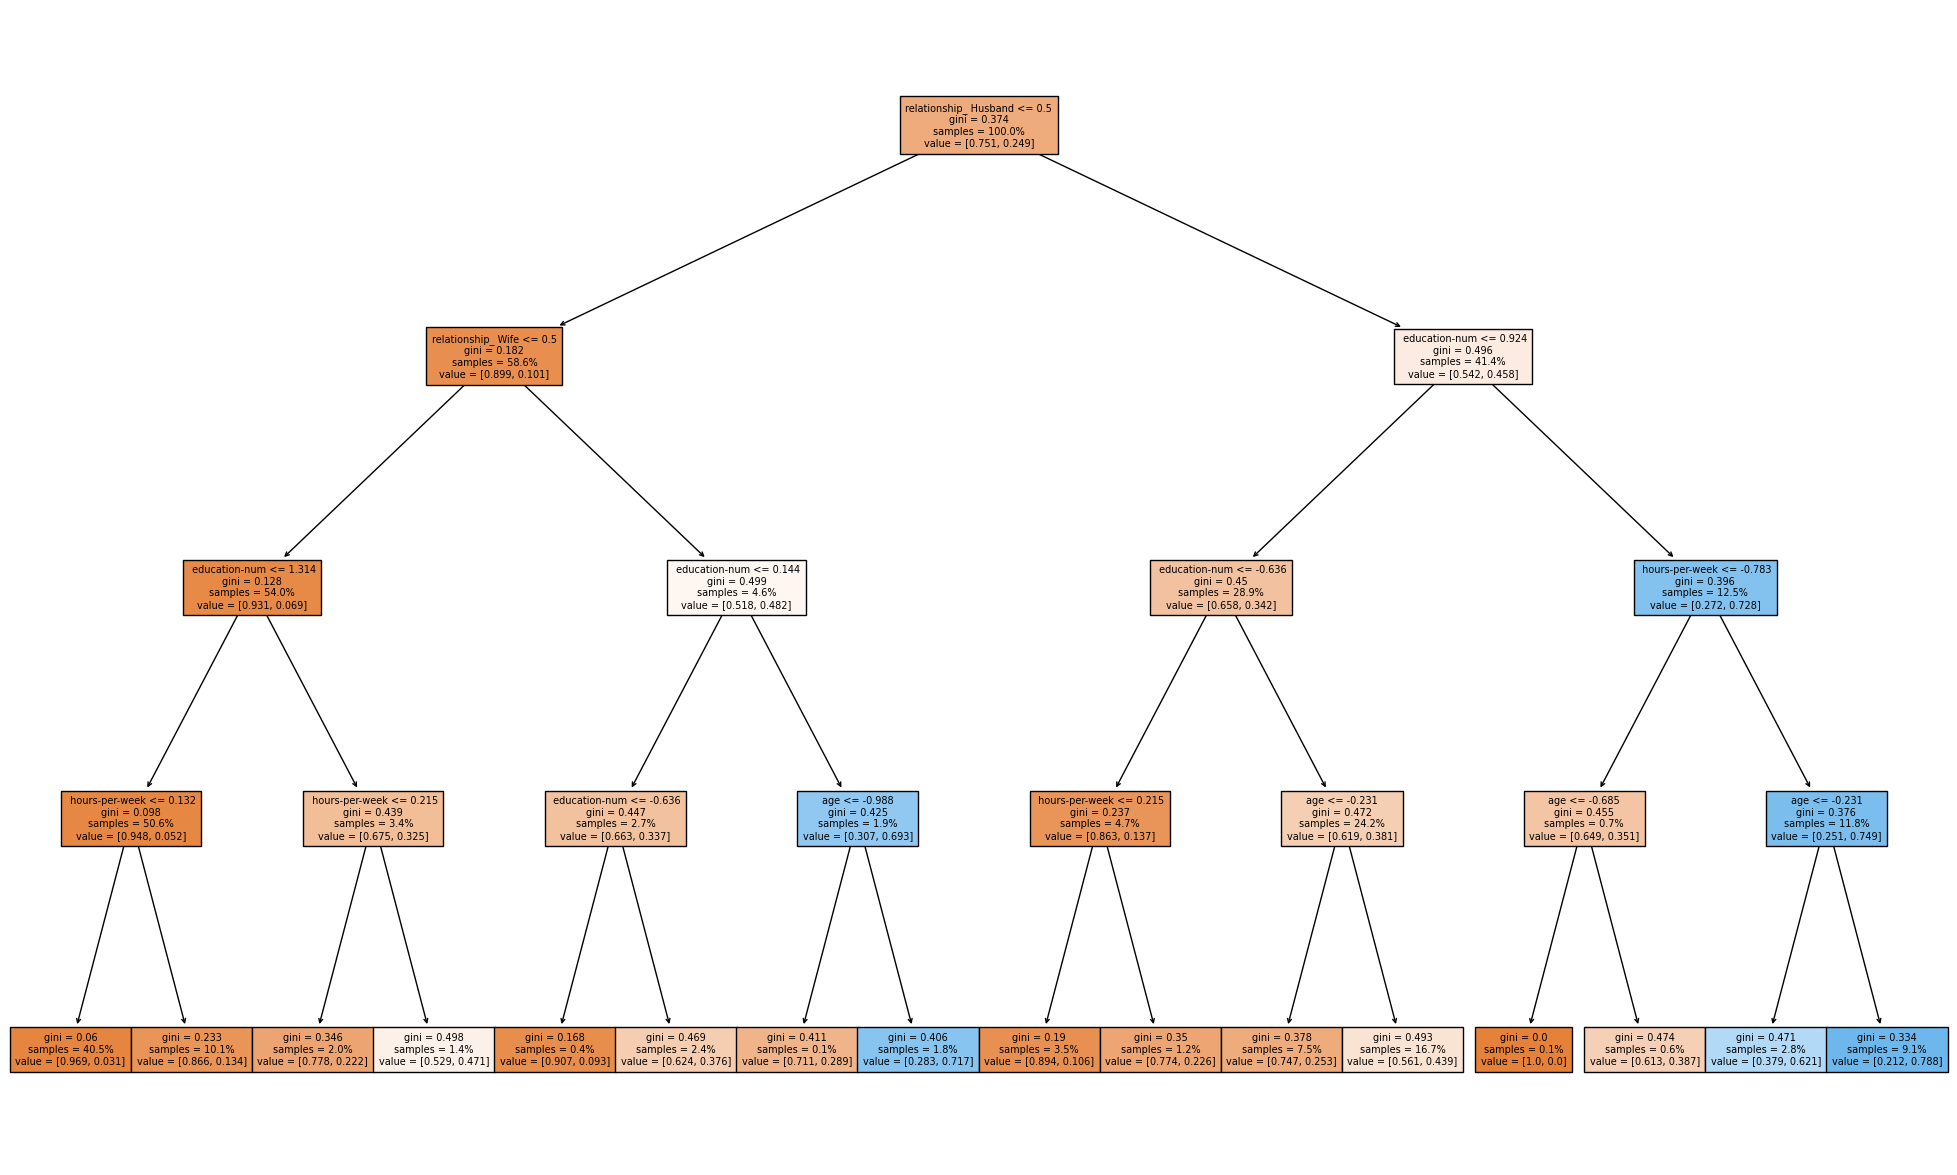

In [94]:
tr = tree.DecisionTreeClassifier(max_depth=4)
tr = tr.fit(X, Y_train)
#I am limiting the depth to three
fig, ax1 = plt.subplots(figsize=(25,15))
tree.plot_tree(tr, ax=ax1, feature_names=featnames, proportion=True, filled=True, fontsize=7)
plt.show()

Blue indicates higher tendency towards high salaries. Note that the numeric variables are standarized (0 is the mean). "Yes's" are to the left, and "No's" to the right.

So here is clear to see that 80% of: husbands, with higher education than the mean, that work more than the mean, and older than the mean, earn more than 50k. This group is only 9% of the total population.

On the other side 97% of wives that are under 1.3 standard deviation about the mean in education (so, they are more educated than the mean), work less than the mean earn less than 50%, and they represent 41% of the population.